In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [9]:
visa=pd.read_csv('excel/visaF.csv', index_col=['date'], parse_dates=['date'])
index=visa.index
fit1 = SimpleExpSmoothing(visa['close']).fit()

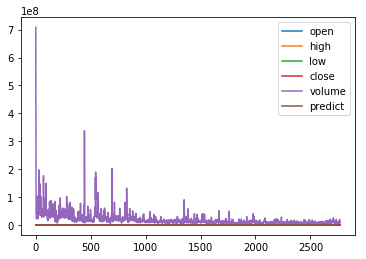

In [3]:
visa['predict']=fit1.fittedvalues
visa.plot()

0.9255125027573762
0.5733134354737868


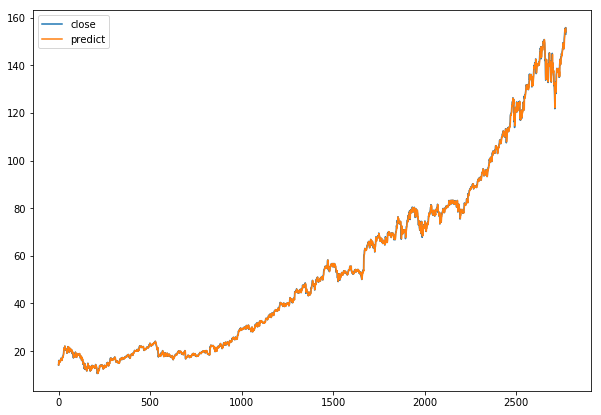

In [4]:
visaP = visa[['close', 'predict']]
visaP.plot(figsize=(10,7))
print(sqrt(mean_squared_error(visa['close'], visa['predict'])))
print(mean_absolute_error(visa['close'], visa['predict']))

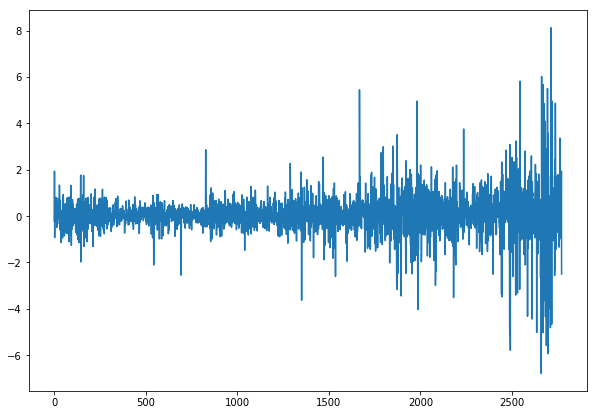

In [5]:
visa['resid']=fit1.resid
visa['resid'].plot(figsize=(10,7))

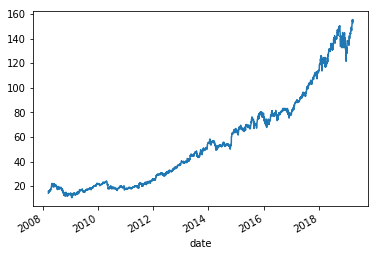

In [11]:
index=pd.date_range('2019-03-18', periods=4, freq='Q')
visaP=pd.DataFrame(fit1.forecast(4), index=index)
visaP.columns=['predict']
visa['close'].plot()
visaP['predict'].plot()

In [12]:
fit1.params

{'smoothing_level': 0.882370650666555,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 14.34133655866488,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}